In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Read csv file and preview
crypto_df = pd.read_csv(Path('resources/crypto_data.csv'))
crypto_df.head(10)

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
6,2015,2015 coin,X11,True,PoW/PoS,NaN,0
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
9,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [3]:
# Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are currently being traded. Once you have done this, drop the IsTrading column from the dataframe.
crypto_df['IsTrading'].value_counts()
crypto_istrading_df = crypto_df.loc[(crypto_df['IsTrading']== True)]
crypto_istrading_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
notrade_df = crypto_istrading_df.drop(columns= ['IsTrading'])
notrade_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [5]:
cleannotrade_df=notrade_df.dropna(how= 'any', axis= 'rows')
cleannotrade_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [6]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
cleannotrade_df['TotalCoinsMined'].value_counts()
#No value with 0

0.000000e+00    152
1.000000e+09      7
1.000000e+08      7
2.500000e+07      2
2.000000e+07      2
               ... 
2.951355e+08      1
3.082571e+10      1
2.108935e+07      1
1.207310e+06      1
7.847417e+06      1
Name: TotalCoinsMined, Length: 520, dtype: int64

In [7]:
# In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric.
# Since the coin names do not contribute to the analysis of the data, delete the CoinName from the original dataframe.
noname_df=cleannotrade_df.drop(columns=['CoinName'])
noname_df=noname_df.drop(columns=['Unnamed: 0'])
noname_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000


In [8]:
noname_df['TotalCoinSupply'] = pd.to_numeric(noname_df['TotalCoinSupply'], errors= 'coerce')
noname_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        685 non-null    object 
 1   ProofType        685 non-null    object 
 2   TotalCoinsMined  685 non-null    float64
 3   TotalCoinSupply  685 non-null    float64
dtypes: float64(2), object(2)
memory usage: 26.8+ KB


In [9]:
# convert the remaining features with text values, Algorithm and ProofType, into numerical data. To accomplish this task, use Pandas to create dummy variables

encoded_crypto_df = pd.get_dummies(noname_df, columns=['Algorithm', 'ProofType'])
encoded_crypto_df.shape
encoded_crypto_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome & train the model
Scalar = StandardScaler()

# Fit data
X_scaled = Scalar.fit_transform(encoded_crypto_df)
X_scaled[:1]

array([[-0.10282804, -0.03823841, -0.03823596, -0.03823596, -0.03823596,
        -0.03823596, -0.05411338, -0.07664017, -0.03823596, -0.05411338,
        -0.05411338, -0.03823596, -0.03823596, -0.18216065, -0.05411338,
        -0.03823596, -0.03823596, -0.08574929, -0.03823596, -0.10160947,
        -0.06632365, -0.03823596, -0.03823596, -0.1642757 , -0.03823596,
        -0.03823596, -0.13908716, -0.03823596, -0.03823596, -0.07664017,
        -0.03823596, -0.03823596, -0.03823596, -0.03823596, -0.06632365,
        -0.03823596, -0.07664017, -0.08574929, -0.07664017, -0.03823596,
        -0.03823596, -0.12775161, -0.1335313 , -0.13908716, -0.03823596,
        -0.05411338, -0.03823596, -0.06632365, -0.1689039 , -0.03823596,
        -0.03823596, -0.03823596, -0.07664017, -0.17342199, -0.33468341,
        -0.03823596, -0.08574929, -0.06632365, -0.05411338, -0.03823596,
         1.42042992, -0.06632365, -0.03823596, -0.03823596, -0.06632365,
        -0.06632365, -0.03823596, -0.03823596, -0.0

In [11]:
# Perform dimensionality reduction with PCA. Rather than specify the number of principal components when you instantiate the PCA model, it is possible to state the desired explained variance. 
# For this project, preserve 90% of the explained variance in dimensionality reduction. 
pca = PCA(n_components=.90)

# fit the model to the PCA
X_pca = pca.fit_transform(X_scaled)

In [12]:
# Examine explain variance
pca.explained_variance_ratio_.cumsum()

array([0.02045753, 0.03972992, 0.0581708 , 0.07654625, 0.0949217 ,
       0.11329715, 0.1316726 , 0.15004805, 0.16838809, 0.18474983,
       0.20044089, 0.21515624, 0.22969061, 0.24399553, 0.25788263,
       0.27075606, 0.28219857, 0.29359828, 0.30456605, 0.31515276,
       0.3250966 , 0.33453436, 0.34395392, 0.35330387, 0.36263554,
       0.37195051, 0.38124569, 0.39050743, 0.39974869, 0.4089869 ,
       0.41821886, 0.42744706, 0.43667526, 0.44590346, 0.45513077,
       0.46435136, 0.47357089, 0.48278556, 0.49200023, 0.5012149 ,
       0.51042537, 0.51963295, 0.5288391 , 0.53804313, 0.54724461,
       0.55644578, 0.56564638, 0.57484657, 0.58404398, 0.5932394 ,
       0.60243332, 0.61162105, 0.62080877, 0.62999649, 0.63918422,
       0.64837194, 0.65755967, 0.66674739, 0.67593512, 0.68512284,
       0.69431057, 0.70349829, 0.71268602, 0.72187374, 0.73106147,
       0.74024919, 0.74943692, 0.75862464, 0.76781236, 0.77700009,
       0.78618781, 0.79537554, 0.80456326, 0.81375099, 0.82293

In [13]:
# Perform dimensionality reduction with PCA. Rather than specify the number of principal components when you instantiate the PCA model, it is possible to state the desired explained variance. 
# For this project, preserve 90% of the explained variance in dimensionality reduction. 
pca = PCA(n_components=3)

# fit the model to the PCA
X_pca = pca.fit_transform(X_scaled)

In [14]:
# Examine explain variance
pca.explained_variance_ratio_.cumsum()

array([0.02045221, 0.03970706, 0.05811381])

In [15]:
# Run t-SNE (T-distributed Stochastic Neighbor Embedding)
tsne = TSNE()
tsne_features = tsne.fit_transform(X_pca)

In [16]:
# Check that dimensions have been reduced to two
tsne_features.shape

(685, 2)

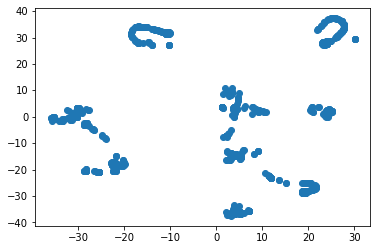

In [17]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [18]:
# Create an elbow plot to identify the best number of clusters. 
# Use a for-loop to determine the inertia for each k between 1 through 10. 
# Determine, if possible, where the elbow of the plot is, and at which value of k it appears.

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

c:\Users\s3maj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,4339.067627
1,2,3077.338406
2,3,1857.957368
3,4,822.970064
4,5,392.276918


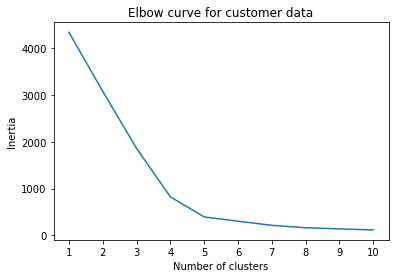

In [19]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()